# Luminosity Template
### This template plots the luminosity function of the Milky Way satellites along with the observations

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
f=h5py.File('/media/sachiwee/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5','r')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/media/sachiwee/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
list(f['Outputs']['Output1']['nodeData'].keys())

In [3]:
# Import Drlica-Wagner data
data_up=pd.read_fwf('/Users/sachiwee/Documents/Dissertation/MW_updated_obs_.txt', skiprows=70,header=None,delimiter=' ')

mask_wagner=data_up.loc[:,11]<400.0
Mv_wagner=data_up.loc[:,13]

In [41]:

#Import McConnachie 2012 data
t = fits.getdata('/Users/sachiwee/Downloads/NearbyGalaxies_Jan2021_PUBLIC.fits', 1)
data = Table(t)

#Calculate (apparent magnitude-Absolute magnitude)
mM=data['dmod']

#Get E(b-v)
a=data['EB-V']

#Calculate distances
exp_distance=(mM)/5.0
do=10*(10.0**exp_distance)
dp=(10.0**((mM+data['dmod+']+5.0-a)/5.0))-do
dm=do-(10.0**((mM-data['dmod-']+5.0-a)/5.0))

#mask satellites within 400 kpc
mask=((do/1000.0)<150.0) 

# Calculate absolute magnitude
Mv=data['Vmag']-mM

#Errors
Mvp=np.sqrt(data['Vmag+']**2.0+data['dmod+']**2.0)
Mvm=np.sqrt(data['Vmag+']**2.0+data['dmod-']**2.0)

#Get iron
FeH=data['[Fe/H]']

fehp=data['feh+']
fehm=data['feh-']

#replace unphysical errors with highest error bars possible i.e. 0.5
for i in range(len(fehp)):
    if (fehp[i]==999.0):
        fehp[i]=0.5
    
for j in range(len(fehm)):
    if (fehm[j]==999.0):
        fehm[j]=0.5  
        
#luminosity
exp=((Mv-4.83)/(-2.5))

expp=((Mv+Mvp-4.83)/(-2.5))

L=10.0**exp
m=(FeH[mask]<999)&(Mv[mask]<999)


extra=[31,45,30]
for i in range(len(Mv[mask])):
    if(data['GalaxyName'][mask][i]=='SMC             '):
        print(data['GalaxyName'][mask][i],Mv[mask][i])
        
mask_magellanic=(data['GalaxyName'][mask]!='SMC             ')
mask_magellanic=np.logical_and((data['GalaxyName'][mask]!='LMC             '),mask_magellanic)


SMC              -16.83


<IPython.core.display.Javascript object>


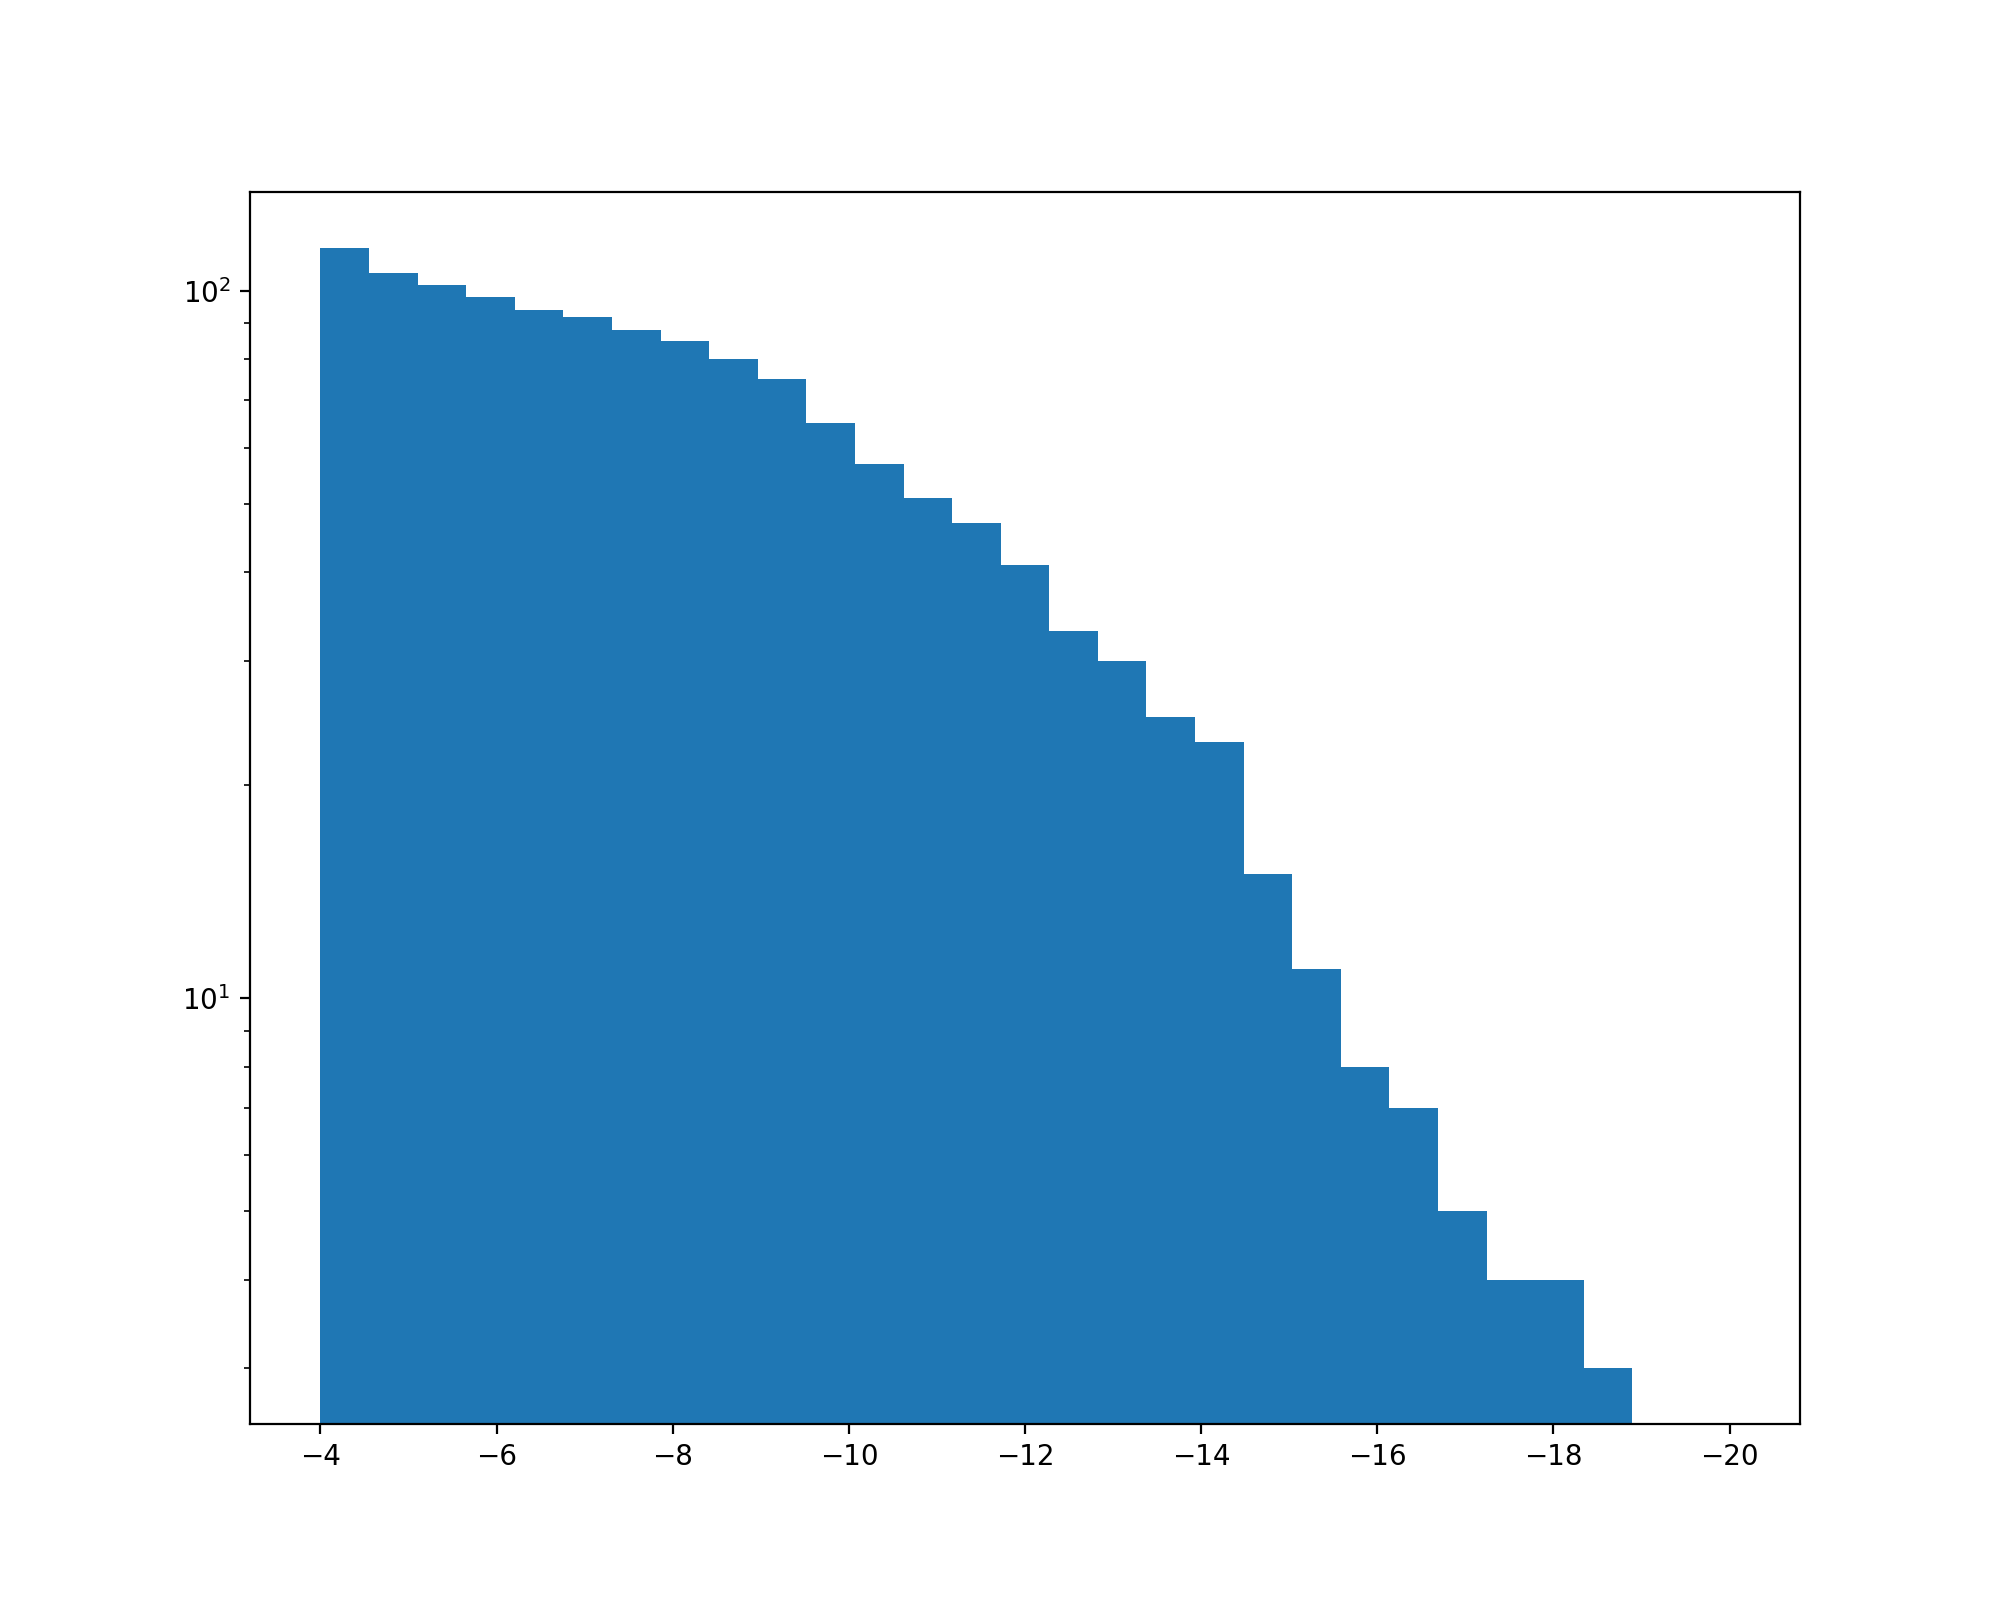

In [44]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.hist(Mv,np.linspace(-20,-4,30),cumulative=1)
ax.set_yscale('log')
ax.invert_xaxis()

In [36]:
for i in extra:
    print(Mv_wagner[mask_wagner][i])
    Mv_observed=np.append(Mv[mask],Mv_wagner[mask_wagner][i])

-4.8
-5.2
-3.32


In [27]:
print(np.amax(Mv_observed))

0.2999992370605469


In [28]:
#Import data from Justice League hydro simulation data
# JL=ascii.read('/home/sachiwee/simulations/MW/50M/d.4096/JusticeLeague.csv')
JL=np.genfromtxt('/Users/sachiwee/Documents/Dissertation/JusticeLeague.txt',names=True)

JL.dtype
Mv_sandra=JL['M_V']
N_sandra=JL['NM_VSandra']
N_elena=JL['NM_VElena']

In [29]:
np.amax(Mv_sandra)

-3.07

In [30]:

#Import FIRE 2 data
fire=np.genfromtxt('/Users/sachiwee/Documents/Dissertation/absolute_magnitudes_FIRE_m12f_m12m_m12i.txt',names=True)
m12f=fire['m12f']
m12m=fire['m12m']
m12i=fire['m12i']

Mv_N_lsr0,Mv_base_lsr0=np.histogram(m12f[m12f!=0],bins=np.linspace(-24,2,50))
cum_Mv_lsr0=np.cumsum(Mv_N_lsr0)

Mv_N_lsr1,Mv_base_lsr1=np.histogram(m12m[m12m!=0],bins=np.linspace(-24,2,50))
cum_Mv_lsr1=np.cumsum(Mv_N_lsr1)

Mv_N_lsr2,Mv_base_lsr2=np.histogram(m12i[m12i!=0],bins=np.linspace(-24,2,50))
cum_Mv_lsr2=np.cumsum(Mv_N_lsr2)

In [31]:
print(np.amax(m12f[m12f!=0]))
print(np.amax(m12m[m12m!=0]))
print(np.amax(m12i[m12i!=0]))

-7.686093457126417
-7.1320492122840236
-7.097268264596849


In [32]:
def plotMv(name,ax,c,label1,obs,col,row,num):
    '''This function takes in a GALACTICUS file and extracts V mag to plot the luminosity function'''
    '''Inputs: file, axes, color,label for property, obs or gal, column, row and number for the axes           '''
#     ax.set_facecolor('k')
    f=h5py.File(name,'r')
#     ax=fig.add_subplot(col,row,num)
    
    mass_dm=f['Outputs']['Output1']['nodeData']['basicMass'][:]
   
    l=np.argmax(mass_dm)
    Lg=f['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:SDSS_g:observed:z0.0000'][:]+f['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:SDSS_g:observed:z0.0000'][:]

    Mg=-2.5*np.log10(Lg)

    
    x=f['Outputs']['Output1']['nodeData']['positionPositionX'][:]-f['Outputs']['Output1']['nodeData']['positionPositionX'][:][l]
    y=f['Outputs']['Output1']['nodeData']['positionPositionY'][:]-f['Outputs']['Output1']['nodeData']['positionPositionY'][:][l]
    z=f['Outputs']['Output1']['nodeData']['positionPositionZ'][:]-f['Outputs']['Output1']['nodeData']['positionPositionZ'][:][l]
    d=np.sqrt(x**2.0+y**2.0+z**2.0)
    satellite_mask=(d<0.150)&(mass_dm<np.amax(mass_dm))
    
    Mv_N,Mv_base=np.histogram(Mv_observed,bins=np.linspace(-24,2,30))
    Mv_N_wagner,Mv_base_wagner=np.histogram(Mv_wagner[mask_wagner],bins=np.linspace(-24,2,30))
    
    Mg_N,Mg_base=np.histogram(Mg[satellite_mask],bins=np.linspace(-24,2,30))
    cum_Mv=np.cumsum(Mv_N)
    cum_Mv_wagner=np.cumsum(Mv_N_wagner)
    cum_Mg=np.cumsum(Mg_N)
    
    
    
    if(obs=='obs'):
#         ax.hist(Mv[mask],bins=np.linspace(-20,2,50),cumulative=1,histtype='step',color='b',linewidth=3,linestyle='--',label='MW',alpha=0.7)
        ax.plot(Mv_base[0:29][Mv_base[0:29]<=0.299],cum_Mv[Mv_base[0:29]<=0.299],color='forestgreen',linewidth=3,linestyle='--',label='MW (McConnachie 2012, Drlica-Wagner+2020)')

        ax.plot(Mv_sandra[Mv_sandra<=-3.07],N_elena[Mv_sandra<=-3.07],color='orange',linewidth=3,linestyle='-.',label='Justice League Elena   (Applebaum et al. 2021)')
        ax.plot(Mv_sandra[Mv_sandra<=-3.07],N_sandra[Mv_sandra<=-3.07],color='coral',linewidth=3,linestyle='-.',label='Justice League Sandra (Applebaum et al. 2021)')

        ax.plot(Mv_base_lsr0[0:49][Mv_base_lsr0[0:49]<=-7.686],cum_Mv_lsr0[Mv_base_lsr0[0:49]<=-7.686],color='lightskyblue',linewidth=2.5,linestyle='-.',label='m12f   (Shipp et al. 2022)')
        ax.plot(Mv_base_lsr1[0:49][Mv_base_lsr1[0:49]<=-7.132],cum_Mv_lsr1[Mv_base_lsr1[0:49]<=-7.132],color='cornflowerblue',linewidth=2.5,linestyle='-.',label='m12m (Shipp et al. 2022)')
        ax.plot(Mv_base_lsr2[0:49][Mv_base_lsr2[0:49]<=-7.097],cum_Mv_lsr2[Mv_base_lsr2[0:49]<=-7.097],color='royalblue',linewidth=2.5,linestyle='-.',label='m12i   (Shipp et al. 2022)')
    else:
        if(label1=='$v_{cooling}=17 km/s$'):
            label1='\bf{$v_{cooling}=17 \;km/s$}'
            ax.hist(Mg[satellite_mask],bins=np.linspace(-24,2,50),cumulative=True,histtype='step',color=c,linewidth=3,label=label1,linestyle='-',zorder=2)
        else:
#            
              ax.plot(Mg_base[0:29],cum_Mg,color=c,linewidth=3,linestyle='-',label=label1)
    ax.set_ylabel('$\mathcal{N}\;(<\,\mathcal{M}_V)$',fontsize=20,color='k')
    ax.set_xlabel('$\mathcal{M}_V$',fontsize=20,color='k')
    
    ms=(Mg[satellite_mask]<-3)&(Mg[satellite_mask]>-25)
    
    ax.set_xlim(-24,0)
    
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax.set_xticks(np.arange(-24,2,2))
    
    ax1 = ax.twiny()
    minL=4/2.5
    maxL=22/2.5
    ax1.set_xlim(10**minL,10**maxL)

    ax1.plot(np.logspace(minL,maxL,10), 1e8*np.ones(len(np.linspace(-22,-4,10))),c='w')
    Lstr=[r'$6.3\times10^8$',r'$1\times10^8$',r'$1.5\times10^7$',r'$2.5\times10^6$',r'$3.9\times10^5$',r'$6.3\times10^4$',r'$1\times10^4$',
     r'$1.5\times10^3$',r'$2.5\times10^2$',r'$3.9\times10^1$']

    ax1.set_xlabel('$\mathcal{L}\;(\mathcal{L}_{\odot})$',fontsize=15,color='k')
    ax1.xaxis.set_tick_params(labelsize=10,labelcolor='k',labeltop=True)
    ax1.set_ylim(1,1e2)
    ax1.set_xscale('log')
    
    ax.legend(fontsize=10,loc='upper right',handlelength=3)
    ax.xaxis.set_tick_params(labelsize=15,labelcolor='k')
    ax.yaxis.set_tick_params(labelsize=15,labelcolor='k')

    
    return ax

def plotMv1(name,fig,c,label1,obs,col,row,num):
    '''This function takes in a GALACTICUS file and extracts V mag to plot the luminosity function'''
    '''Inputs: file, axes, color,label for property, obs or gal                                   '''
#     ax.set_facecolor('k')
    f=h5py.File(name,'r')
    ax=fig.add_subplot(col,row,num)
    
    mass_dm=f['Outputs']['Output1']['nodeData']['basicMass'][:]
   
    l=np.argmax(mass_dm)
    Lg=f['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:SDSS_g:observed:z0.0000'][:]+f['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:SDSS_g:observed:z0.0000'][:]

    Mg=-2.5*np.log10(Lg)

    
    x=f['Outputs']['Output1']['nodeData']['positionPositionX'][:]-f['Outputs']['Output1']['nodeData']['positionPositionX'][:][l]
    y=f['Outputs']['Output1']['nodeData']['positionPositionY'][:]-f['Outputs']['Output1']['nodeData']['positionPositionY'][:][l]
    z=f['Outputs']['Output1']['nodeData']['positionPositionZ'][:]-f['Outputs']['Output1']['nodeData']['positionPositionZ'][:][l]
    d=np.sqrt(x**2.0+y**2.0+z**2.0)
    satellite_mask=(d<0.4)&(mass_dm<1e12)
    
    Mv_N,Mv_base=np.histogram(Mv,bins=np.linspace(-24,2,30))
    Mg_N,Mg_base=np.histogram(Mg,bins=np.linspace(-24,2,30))
    cum_Mv=np.cumsum(Mv_N)
    cum_Mg=np.cumsum(Mg_N)
    if(obs=='obs'):
#         ax.hist(Mv[mask],bins=np.linspace(-20,2,50),cumulative=1,histtype='step',color='b',linewidth=3,linestyle='--',label='MW',alpha=0.7)
        ax.plot(Mv_base[0:29][Mv_base[0:29]<=0.299],cum_Mv[Mv_base[0:29]<=0.299],color='seagreen',linewidth=4,linestyle='--',label='MW')
        ax.plot(base148[0:29],N148,color='coral',linewidth=2,linestyle='-.',label='Justice League Elena  (Applebaum et al. 2021)')
        ax.plot(base229[0:29],N229,color='orange',linewidth=2,linestyle='-.',label='Justice League Sandra (Applebaum et al. 2021)')
#         ax.plot(base229,N229,color='orange',linewidth=2,linestyle='-.',label='Justice League 229',alpha=0.7)
    elif(obs=='both'):
#         ax.hist(Mv[mask],bins=np.linspace(-20,2,50),cumulative=1,histtype='step',color='b',linewidth=3,linestyle='--',label='MW',alpha=0.7)
        ax.plot(Mv_base[0:29][Mv_base[0:29]<=0.299],cum_Mv[Mv_base[0:29]<=0.299],color='seagreen',linewidth=4,linestyle='--',label='MW')
        ax.plot(base148[0:29],N148,color='coral',linewidth=2,linestyle='-.',label='Justice League Elena  (Applebaum et al. 2021)')
        ax.plot(base229[0:29],N229,color='orange',linewidth=2,linestyle='-.',label='Justice League Sandra (Applebaum et al. 2021)') 
    else:
        ax.plot(Mg_base[0:29],cum_Mg,color=c,linewidth=4,linestyle='-',label=label1)
    ax.set_ylabel('$\mathcal{N}\;(<\,\mathcal{M}_V)$',fontsize=20,color='k')
    ax.set_xlabel('$\mathcal{M}_V$',fontsize=20,color='k')
    ms=(Mg[satellite_mask]<-3)&(Mg[satellite_mask]>-25)
    
    ax.set_xlim(-24,2)
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax1 = ax.twinx()
    ax1.set_xticks( ax.get_xticks() )
    ax1.set_xbound(ax.get_xbound())
    ax1.set_xticklabels([10**(x/-2.5) for x in ax.get_xticks()])
    ax1.set_xlabel('$\mathcal{L}_{\odot}$',fontsize=20,color='k')
    ax.xaxis.set_tick_params(labelsize=15,labelcolor='k')
    ax.yaxis.set_tick_params(labelsize=15,labelcolor='k')
    leg=ax.legend(fontsize=9,loc='upper right')
#     plt.setp(leg.get_texts(), color='w')
    frame = leg.get_frame()
#     frame.set_color('k')
    
    return ax



In [33]:
def plotMv_eps(name,fig,c,label1,obs,col,row,num):
    '''This function takes in a GALACTICUS file and extracts V mag to plot the luminosity function'''
    '''Inputs: file, axes, color,label for property, obs or gal, column, row and number for the axes           '''
#     ax.set_facecolor('k')
    f=h5py.File(name,'r')
    ax=fig.add_subplot(col,row,num)
    
    mass_dm=f['Outputs']['Output1']['nodeData']['basicMass'][:]
   
    l=np.argmax(mass_dm)
    Lg=f['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:DES_g:observed:z0.0000'][:]+f['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:DES_g:observed:z0.0000'][:]

    Mg=-2.5*np.log10(Lg)

    
    satellite_mask=mass_dm<np.amax(mass_dm)
    
    Mv_N,Mv_base=np.histogram(Mv_observed,bins=np.linspace(-24,2,30))
    Mv_N_wagner,Mv_base_wagner=np.histogram(Mv_wagner[mask_wagner],bins=np.linspace(-24,2,30))
    
    Mg_N,Mg_base=np.histogram(Mg[satellite_mask],bins=np.linspace(-24,2,30))
    cum_Mv=np.cumsum(Mv_N)
    cum_Mv_wagner=np.cumsum(Mv_N_wagner)
    cum_Mg=np.cumsum(Mg_N)
    if(obs=='obs'):
#         ax.hist(Mv[mask],bins=np.linspace(-20,2,50),cumulative=1,histtype='step',color='b',linewidth=3,linestyle='--',label='MW',alpha=0.7)
        ax.plot(Mv_base[0:29],cum_Mv,color='seagreen',linewidth=3,linestyle='--',label='Observations (McConnachie 2012)')

    else:
        if(label1=='$v_{cooling}=17 km/s$'):
            label1='\bf{$v_{cooling}=17 \;km/s$}'
            ax.hist(Mg,bins=np.linspace(-24,2,50),cumulative=True,histtype='step',color=c,linewidth=3,label=label1,linestyle='-',zorder=2)
        else:
#       
              ax.plot(Mg_base[0:29],cum_Mg,color=c,linewidth=3,linestyle='-',label=label1)
    ax.set_ylabel('$\mathcal{N}(<M_V)$',fontsize=25,color='k')
    ax.set_xlabel('$\mathcal{M}_V$',fontsize=25,color='k')
    
    
    ax.set_xlim(-24,2)
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax.set_xticks(np.linspace(-24,2,14))
    ax.xaxis.set_tick_params(labelsize=20,labelcolor='k')
    ax.yaxis.set_tick_params(labelsize=20,labelcolor='k')
    leg=ax.legend(fontsize=15,loc='upper right')
#     plt.setp(leg.get_texts(), color='w')
    frame = leg.get_frame()
    
    ax1 = ax.twiny()
    minL=4/2.5
    maxL=22/2.5
    ax1.set_xlim(10**minL,10**maxL)
#     ax1.set_xticks(np.logspace(1,10,10))
    ax1.plot(np.logspace(minL,maxL,10), 1e8*np.ones(len(np.linspace(-22,-4,10))),c='w')
    Lstr=[r'$6.3\times10^8$',r'$1\times10^8$',r'$1.5\times10^7$',r'$2.5\times10^6$',r'$3.9\times10^5$',r'$6.3\times10^4$',r'$1\times10^4$',
     r'$1.5\times10^3$',r'$2.5\times10^2$',r'$3.9\times10^1$']
#     ax1.set_xticklabels(fontsize=8)
    ax1.set_xlabel('$\mathcal{L}\;(\mathcal{L}_{\odot})$',fontsize=15,color='k')
    ax1.xaxis.set_tick_params(labelsize=10,labelcolor='k',labeltop=True)
    ax1.set_ylim(1,1e4)
    ax1.set_xscale('log')
#     frame.set_color('k')
    print(np.shape([]))
    return ax



<IPython.core.display.Javascript object>


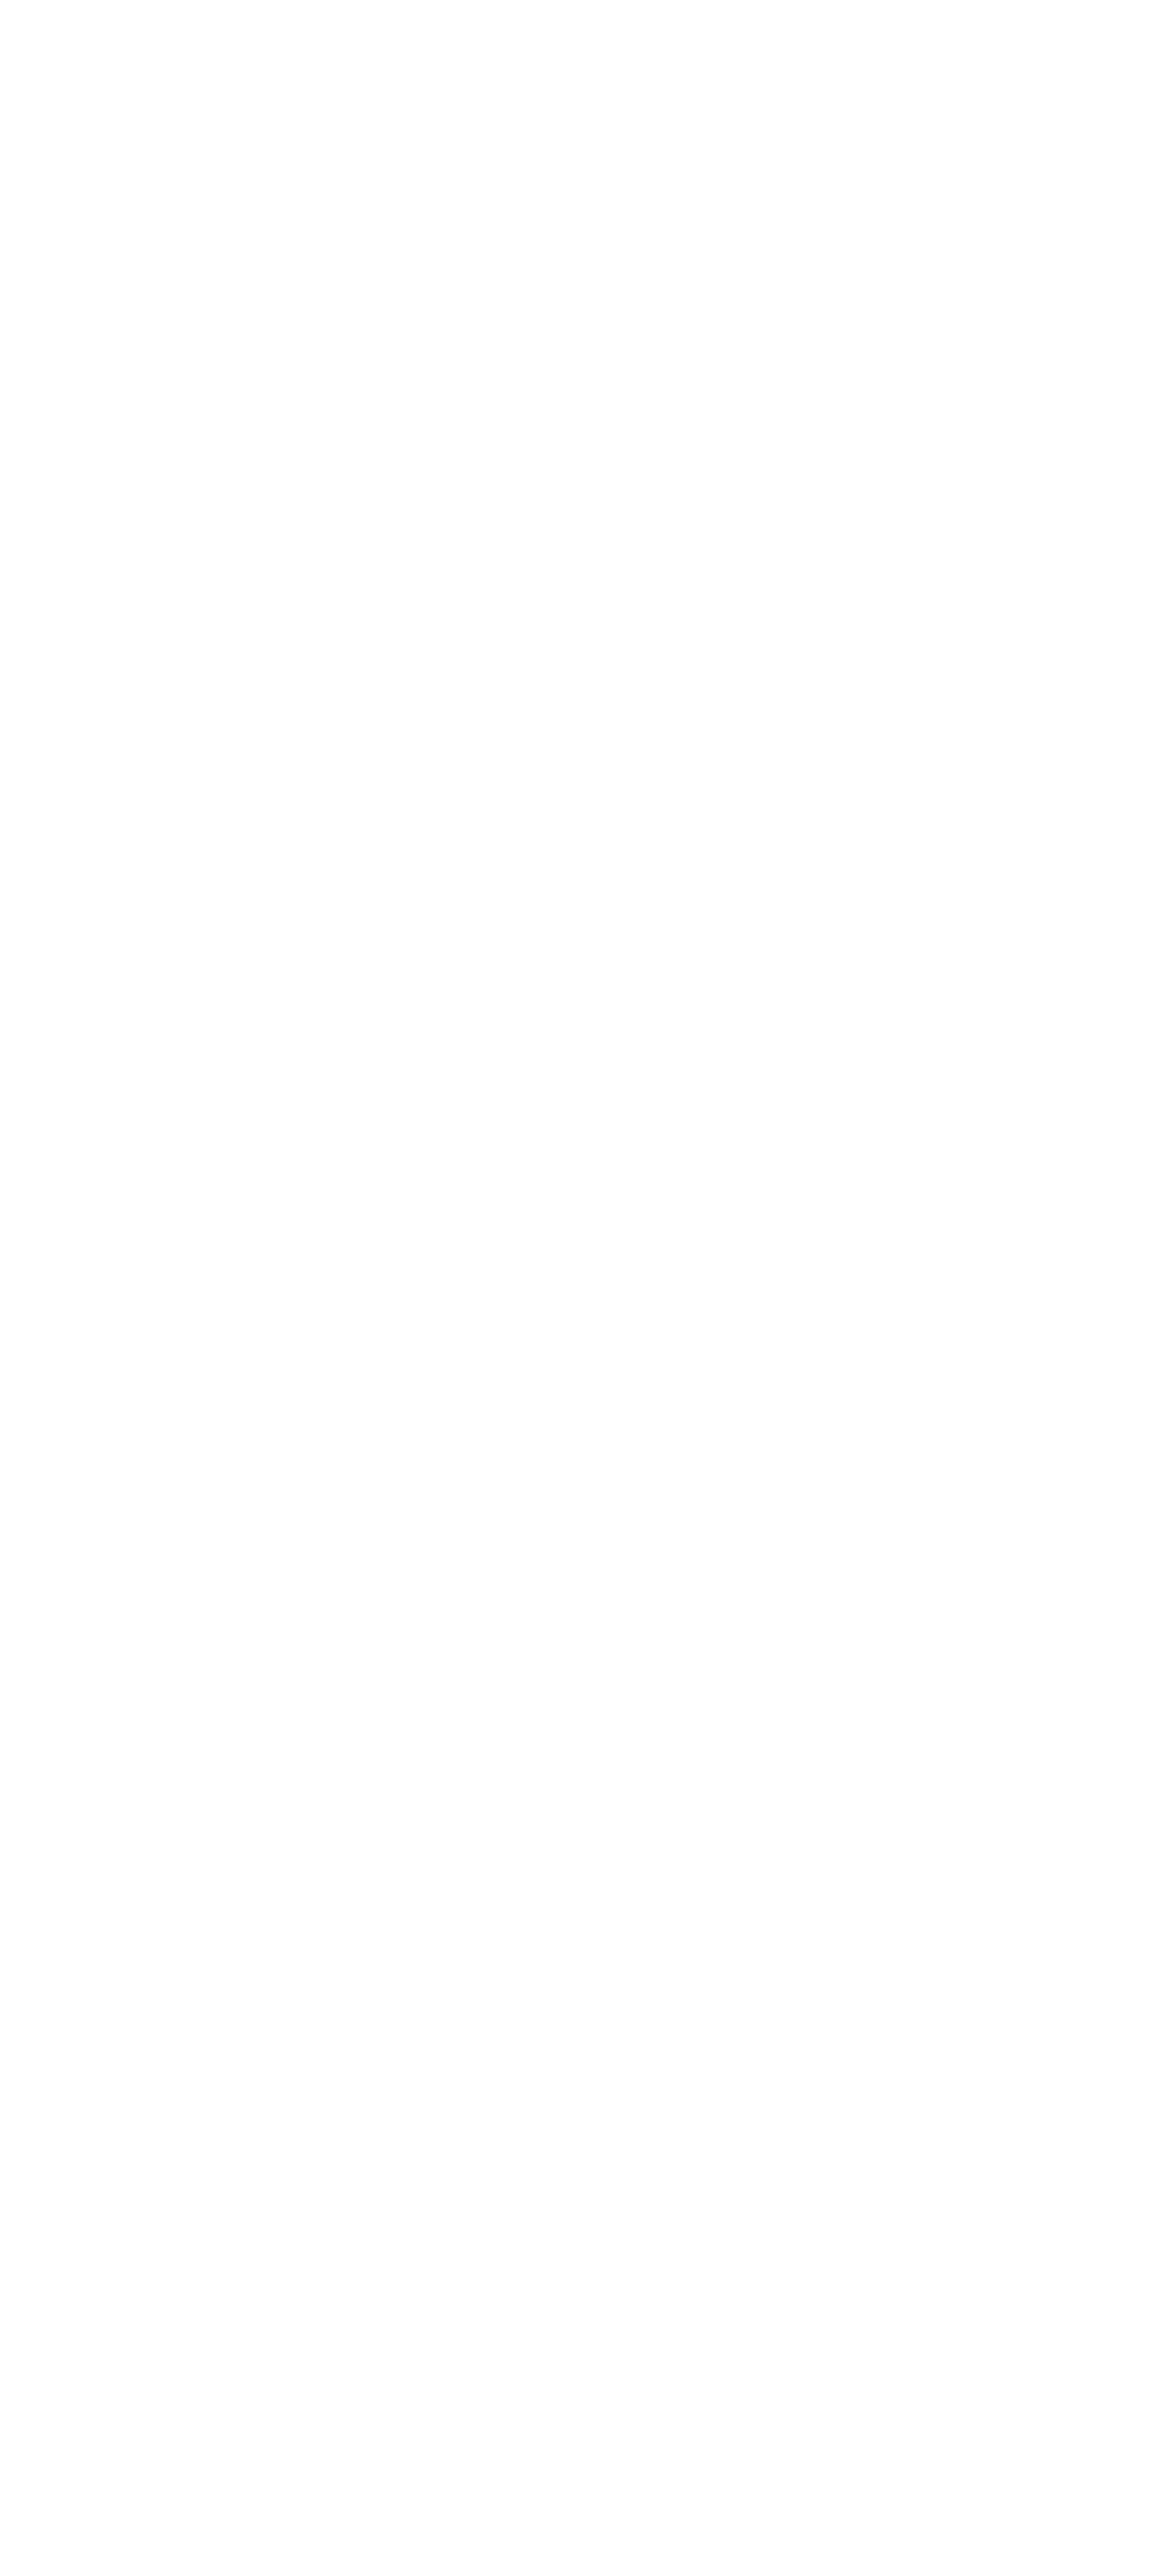

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [34]:
%matplotlib notebook
fig=plt.figure(figsize=(9,20))
# ax=fig.add_subplot(111)
# ax1=fig.add_subplot(122)
fig.patch.set_facecolor('w')
# plotMv('/media/sachiwee/ArmorATD/GAL_outputs/MW/50M/d.4096/AHFoutputs/MW_zR9_vF30/non_MWoutputs/vFcooling/vFcooling/HI/SFR/newruns/grid_cv/MW_zR9_vF30_17lspnv_cV60_60_e1.5_2.1_blitz_fit_nonMWoutputs/vFcooling/vFcooling_HI_rP0.01_cold_AGNchanges_tidal.hdf5',fig,'aquamarine','$v_{cooling}=15 \;km/s$','obs',1,2,1)



plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'gold','original, z','obs',3,1,1)

plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'indianred','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,15\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'lightcoral','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,16\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'gold','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,17\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'greenyellow','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,18\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'lime','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,19\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'limegreen','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,20\,km/s$','gal',3,1,1)

plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'gold','original, z','obs',3,1,2)

plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'indianred','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,15\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'lightcoral','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,16\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'gold','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,17\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'greenyellow','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,18\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'lime','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,19\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'limegreen','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,20\,km/s$','gal',3,1,2)


plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'gold','original, z','obs',3,1,3)

plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'indianred','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,15\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'lightcoral','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,16\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'gold','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,17\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'greenyellow','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,18\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'lime','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,19\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'limegreen','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,20\,km/s$','gal',3,1,3)
fig.savefig('/media/sachiwee/ArmorATD/MW_MAC/figures/Mv_cooling_vF_400kpc.pdf')


<IPython.core.display.Javascript object>


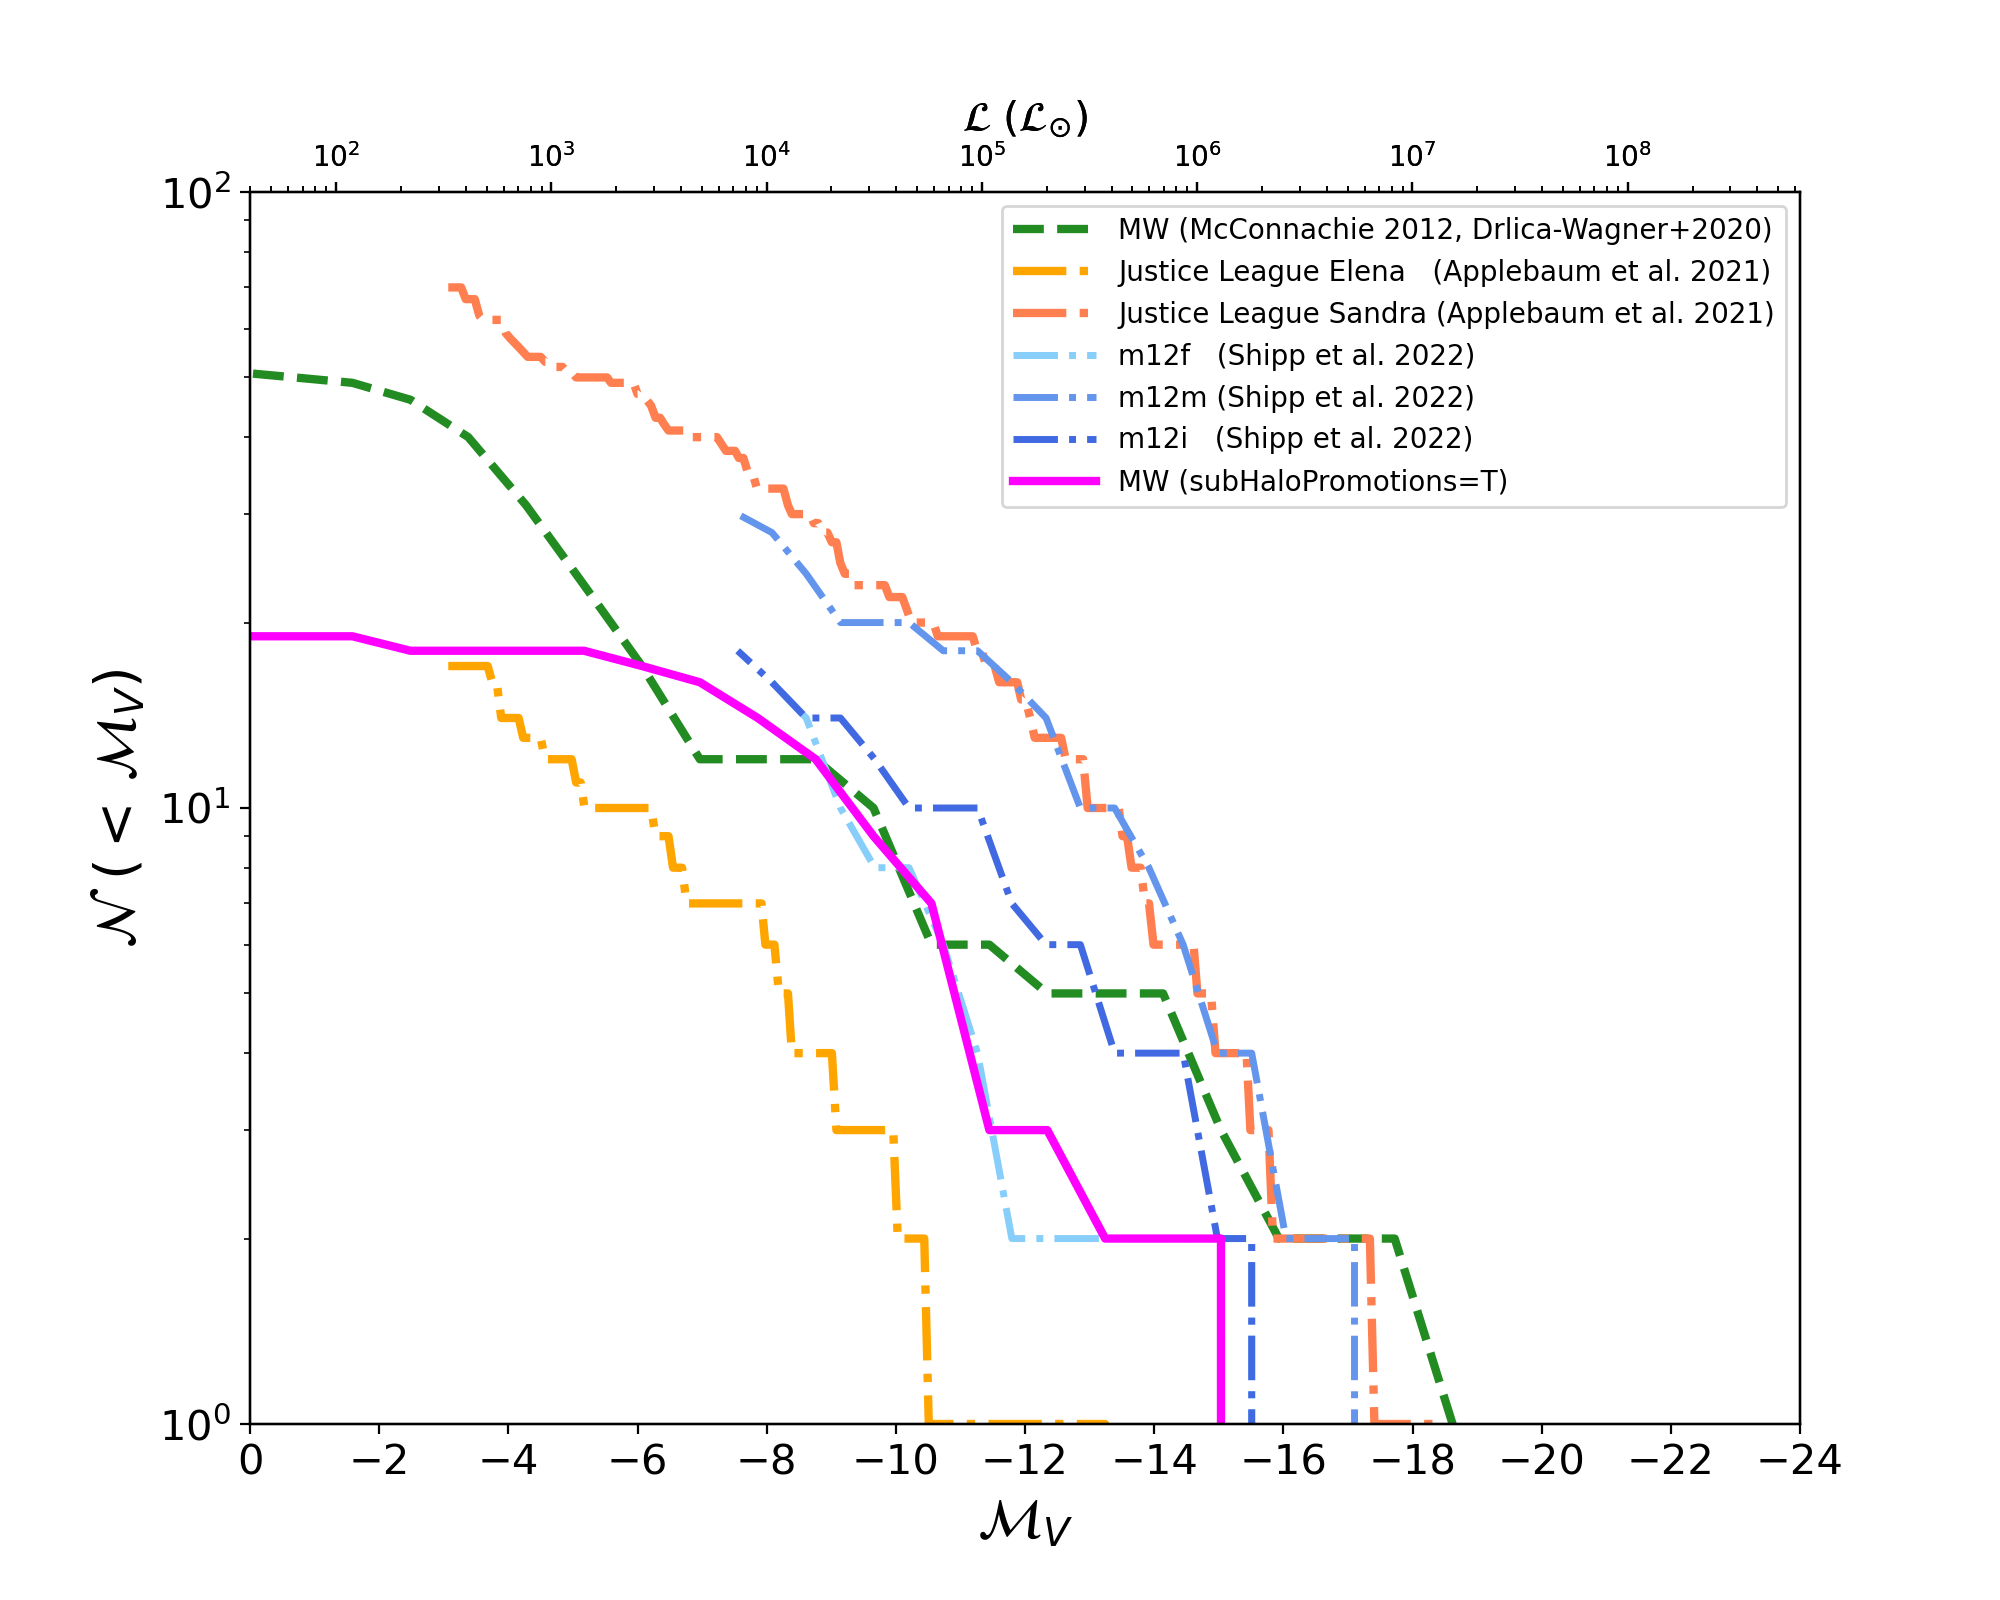

/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_75144/2763088242.py:13: RuntimeWarning: divide by zero encountered in log10
  Mg=-2.5*np.log10(Lg)
/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_75144/2763088242.py:13: RuntimeWarning: invalid value encountered in log10
  Mg=-2.5*np.log10(Lg)


In [35]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
# plotMv('/Volumes/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5',fig1,'fuchsia','MW','obs',1,1,1)
# name,fig,c,label1,obs,col,row,num
ax=plotMv('/Users/sachiwee/Desktop/galacticus_outputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_test2.hdf5',ax,'FUCHSIA','MW (Default,ins, $e_{disk,sph}=1.6,0.4$, SNe, Cooling= 17 km/s)','obs',1,1,1)
ax=plotMv('/Users/sachiwee/Desktop/galacticus_outputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_test2.hdf5',ax,'fuchsia','MW (subHaloPromotions=T)','gal',1,1,1)
# ax=plotMv('/Volumes/Elements/valivarre/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_correct_hlr_subHaloPromotionsF.hdf5',ax,'purple','MW (subHaloPromotions=F)','gal',1,1,1)
# plotMv_eps('/Volumes/ArmorATD/MW_MAC/MWoutputs_6_11_22/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_MW_res_correct1.hdf5',fig1,'darkorchid',r'MW (Galacticus, EPS)','gal',1,1,1)
# ax=plotMv('/Users/sachiwee/Desktop/galacticus_outputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_test2.hdf5',ax,'fuchsia',r'MW ($\beta_{tidal}\,=\,0.01$)','gal',1,1,1)
# ax=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/tidal1/tidal1/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal1_ode_sfh390_vdis.hdf5',ax,'orchid',r'MW ($\beta_{tidal}\,=\,0.10$)','gal',1,1,1)
# ax=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/tidal1/tidal1/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal100_ode_sfh390_vdis.hdf5',ax,'darkorchid',r'MW ($\beta_{tidal}=1.00$)','gal',1,1,1)
# ax=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_virialR.hdf5',ax,'darkorchid',r'MW (No ram pressure stripping)','gal',1,1,1)
# ax=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs_6_11_22/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_test2.hdf5',ax,'fuchsia',r'MW (Font et al. 2008, $\beta_{ram}\,=\,1.00$)','gal',1,1,1)
# plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs_6_11_22/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_correct_AGN.hdf5',fig1,'royalblue',r'MW (AGN adjusted)','gal',1,1,1)
# ax=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/ram1/ram1/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram01_tidal01_ode_sfh390_vdis.hdf5',ax,'violet',r'MW (Font et al. 2008, $\beta_{ram}\,=\,0.01$)','gal',1,1,1)
# plotMv('/Volumes/ArmorATD/MW_testruns/instantaneous/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram01_tidal100_ode_vel300.hdf5',fig1,'darkorchid',r'MW ($\beta_{tidal}=1.00$)','gal',1,1,1)
# plotMv_eps('/Volumes/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5',fig1,'fuchsia',r'Fornax (EPS)','obs',1,1,1)
# plotMv_eps('/Volumes/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5',fig1,'fuchsia',r'Fornax (EPS)','gal',1,1,1)
# 
# plotMv('/Volumes/ArmorATD/EPS_o/MW_original_z_cooling_ode.hdf5',fig1,'fuchsia','z, cooling (old)','gal',1,1,1)

In [16]:
fig.savefig('/Users/sachiwee/Documents/Dissertation/Mv_subHaloPromotions.jpg')

In [ ]:
fig2=plt.figure(figsize=(10,8))
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_spnv_coldmode_ode.hdf5',fig2,'fuchsia','Default (spnv)','obs',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_spnv_coldmode_ode.hdf5',fig2,'royalblue','Default (spnv)','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_spnv_coldmode_ode.hdf5',fig2,'lime','Default (spnv), nonins','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_spnv_coldmode_rP_ode.hdf5',fig2,'b','Default (spnv), RAM','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_spnv_coldmode_rP_ode.hdf5',fig2,'seagreen','Default (spnv), nonins, RAM','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_blitz_spnv_coldmode_ode.hdf5',fig2,'coral','Default (spnv), Blitz','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_blitz_spnv_coldmode_ode.hdf5',fig2,'orange','Default (spnv), nonins, Blitz','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_spnv_coldmode_tidal_ode.hdf5',fig2,'orchid','Default (spnv), Tidal','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_spnv_coldmode_tidal_ode.hdf5',fig2,'m','Default (spnv), nonins, Tidal','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_spnv_ramp_ode.hdf5',fig2,'lime','z, cooling, $v_{charac}$, SPNV, RP, nonins','gal',1,1,1)
fig2.savefig('/media/sachiwee/ArmorATD/MW_testruns/figures/Mv_MW_spnv_ins_nonins_coldmode.pdf')

<IPython.core.display.Javascript object>


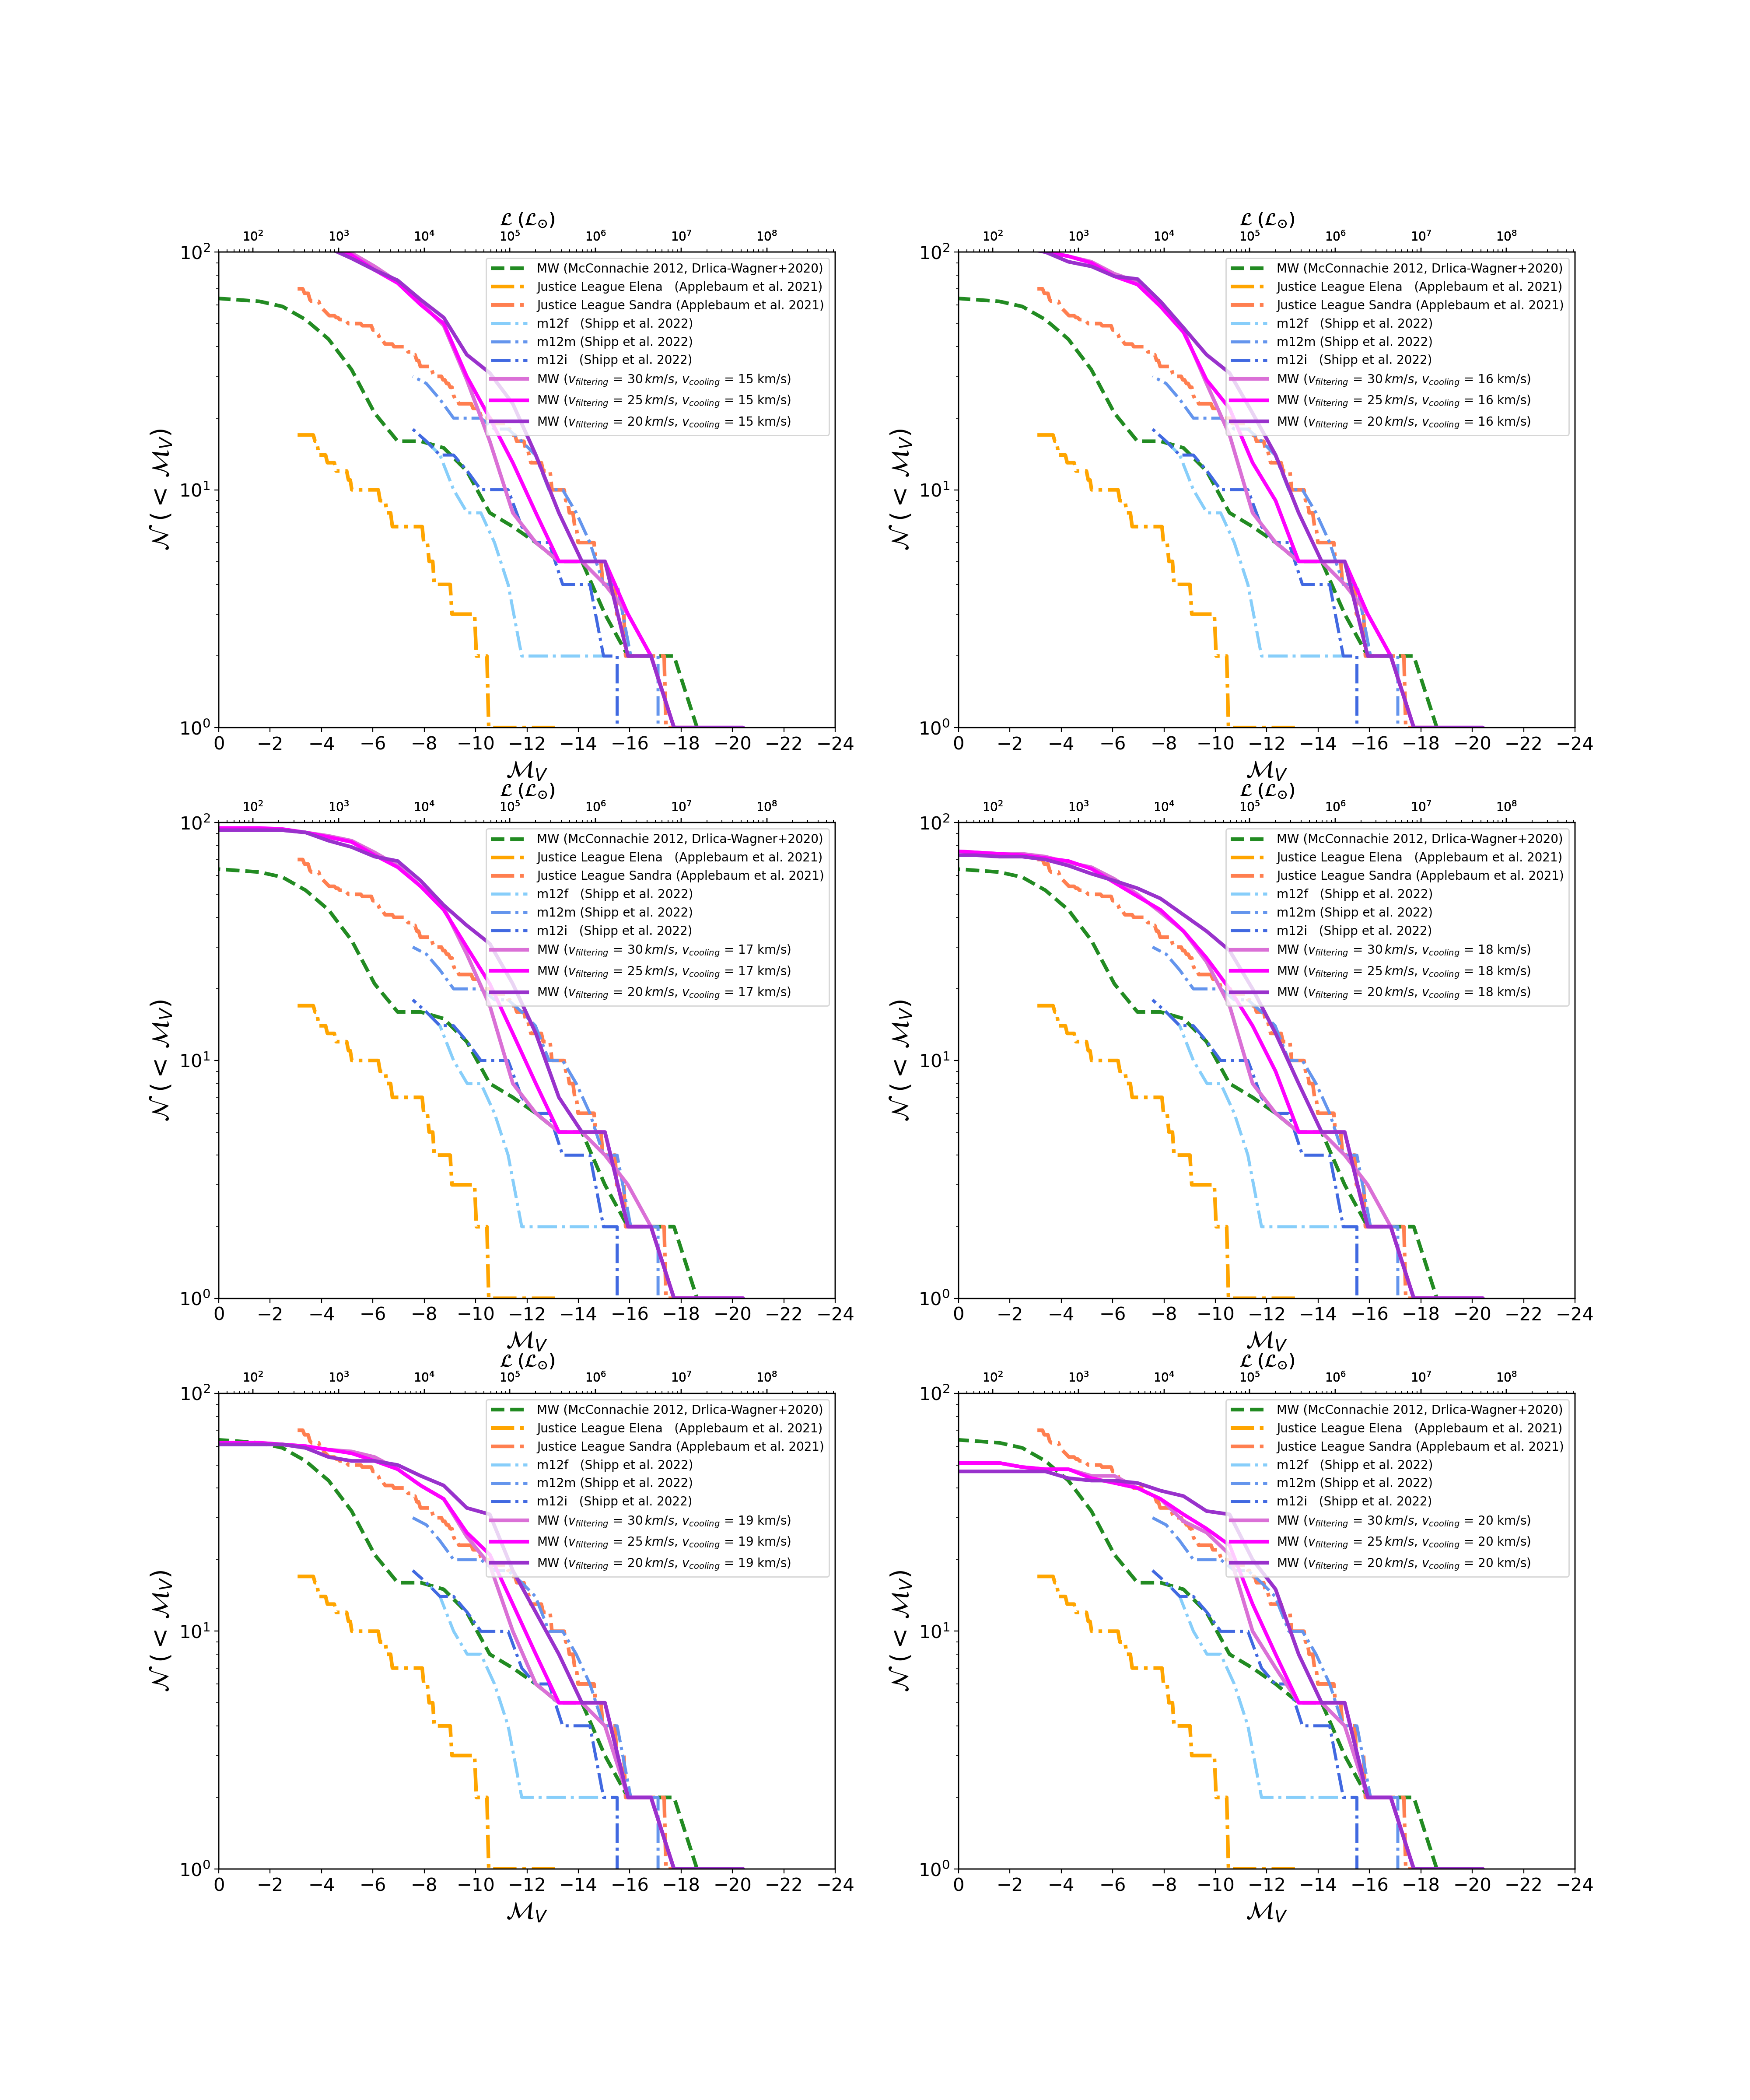

/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_2253/1249192029.py:13: RuntimeWarning: divide by zero encountered in log10
  Mg=-2.5*np.log10(Lg)
/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_2253/1249192029.py:13: RuntimeWarning: invalid value encountered in log10
  Mg=-2.5*np.log10(Lg)


In [12]:
fig3=plt.figure(figsize=(20,24))
ax1=fig3.add_subplot(321)
ax1=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',ax1,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,1)
ax1=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax1,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 15 km/s)','gal',3,2,1)
ax1=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax1,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 15 km/s)','gal',3,2,1)
ax1=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',ax1,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 15 km/s)','gal',3,2,1)

ax2=fig3.add_subplot(322)
ax2=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',ax2,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,2)
ax2=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax2,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 16 km/s)','gal',3,2,2)
ax2=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax2,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 16 km/s)','gal',3,2,2)
ax2=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',ax2,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 16 km/s)','gal',3,2,2)

ax3=fig3.add_subplot(323)
ax3=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax3,'orchid','MW (z=30, $v_{cooling}$ = 17 km/s)','obs',3,2,3)
ax3=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax3,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 17 km/s)','gal',3,2,3)
ax3=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax3,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 17 km/s)','gal',3,2,3)
ax3=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift.hdf5',ax3,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 17 km/s)','gal',3,2,3)

ax4=fig3.add_subplot(324)
ax4=plotMv('/Volumes/ArmorATD/MW_testruns/instantaneous/vF_cooling_new2/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01.hdf5',ax4,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,4)
ax4=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax4,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 18 km/s)','gal',3,2,4)
ax4=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax4,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 18 km/s)','gal',3,2,4)
ax4=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax4,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 18 km/s)','gal',3,2,4)

ax5=fig3.add_subplot(325)
ax5=plotMv('/Volumes/ArmorATD/MW_testruns/instantaneous/vF_cooling_new2/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01.hdf5',ax5,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,5)
ax5=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax5,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 19 km/s)','gal',3,2,5)
ax5=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',ax5,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 19 km/s)','gal',3,2,5)
ax5=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax5,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 19 km/s)','gal',3,2,5)

ax6=fig3.add_subplot(326)
ax6=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax6,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,6)
ax6=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax6,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 20 km/s)','gal',3,2,6)
ax6=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax6,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 20 km/s)','gal',3,2,6)
ax6=plotMv('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',ax6,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 20 km/s)','gal',3,2,6)
fig3.savefig('/Users/sachiwee/Documents/Dissertation/Mv_cooling_vF.pdf')

In [ ]:
plt.plot(np.linspace(0,1,10))

In [ ]:
f=h5py.File('/Volumes/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5','r')


In [ ]:
f['Outputs']['Output1']['nodeData'].keys()